### 载入数据

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
train = pd.read_csv('train.csv',dtype={'StateHoliday':object}) 
store =  pd.read_csv('store.csv')
test = pd.read_csv('test.csv')

In [3]:
train.info()
test.info()
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
Store            1017209 non-null int64
DayOfWeek        1017209 non-null int64
Date             1017209 non-null object
Sales            1017209 non-null int64
Customers        1017209 non-null int64
Open             1017209 non-null int64
Promo            1017209 non-null int64
StateHoliday     1017209 non-null object
SchoolHoliday    1017209 non-null int64
dtypes: int64(7), object(2)
memory usage: 69.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
Id               41088 non-null int64
Store            41088 non-null int64
DayOfWeek        41088 non-null int64
Date             41088 non-null object
Open             41077 non-null float64
Promo            41088 non-null int64
StateHoliday     41088 non-null object
SchoolHoliday    41088 non-null int64
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ 

### 整理数据

In [4]:
#首先整理test数据
#展现Open为nan的数据
# print(test.query('Open=="NaN"'))
#根据Open为NaN的数据展现，由于日期非节假日商店应该都是开门的把NaN替换成1，把0.0变成0，把1.0变成1
test['Open']=test['Open'].fillna(1)
test['Open']=test['Open'].astype(int)
# print(test['Open'].value_counts())
test['Date']=pd.to_datetime(test['Date'])

# 把date拆成year，month和day，重新设置DayOfWeek

test['Year']=test['Date'].dt.year
test['Month']=test['Date'].dt.month
test['Day']=test['Date'].dt.day
test['WeekOfYear']=test['Date'].dt.weekofyear
test['DayOfWeek']=test['Date'].dt.dayofweek
# test.drop('Date',axis=1, inplace=True)

#设置StateHoliday a:1,b:2,c:3
test.loc[test["StateHoliday"]=='a','StateHoliday']=1
test.loc[test["StateHoliday"]=='b','StateHoliday']=2
test.loc[test["StateHoliday"]=='c','StateHoliday']=3
test['StateHoliday']=test['StateHoliday'].astype(int)

# print(test["StateHoliday"].value_counts())

test.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 12 columns):
Id               41088 non-null int64
Store            41088 non-null int64
DayOfWeek        41088 non-null int64
Date             41088 non-null datetime64[ns]
Open             41088 non-null int32
Promo            41088 non-null int64
StateHoliday     41088 non-null int32
SchoolHoliday    41088 non-null int64
Year             41088 non-null int64
Month            41088 non-null int64
Day              41088 non-null int64
WeekOfYear       41088 non-null int64
dtypes: datetime64[ns](1), int32(2), int64(9)
memory usage: 3.4 MB


In [5]:
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear
0,1,1,3,2015-09-17,1,1,0,0,2015,9,17,38
1,2,3,3,2015-09-17,1,1,0,0,2015,9,17,38
2,3,7,3,2015-09-17,1,1,0,0,2015,9,17,38
3,4,8,3,2015-09-17,1,1,0,0,2015,9,17,38
4,5,9,3,2015-09-17,1,1,0,0,2015,9,17,38


In [6]:
#接着整理store数据

#把Assortment整理为a:1,b:2,c:3
store.loc[store["Assortment"]=='a','Assortment']=1
store.loc[store["Assortment"]=='b','Assortment']=2
store.loc[store["Assortment"]=='c','Assortment']=3
store['Assortment']=store['Assortment'].astype(int)
#把StoreType整理为a:1,b:2,c:3,d:4
store.loc[store["StoreType"]=='a','StoreType']=1
store.loc[store["StoreType"]=='b','StoreType']=2
store.loc[store["StoreType"]=='c','StoreType']=3
store.loc[store["StoreType"]=='d','StoreType']=4
store['StoreType']=store['StoreType'].astype(int)

print(store.query('CompetitionDistance=="NaN"'))
#可以理解为合理范围内没有任何的竞争对手记下Store号码：291，622，879
store['CompetitionDistance']=store['CompetitionDistance'].fillna(0)
def f(x):
    return x-int(x)
print(store['CompetitionDistance'].apply(f).value_counts())
# 由于CompetitionDistance所有的小数部分都是0把CompetitionDistance转为int
store['CompetitionDistance']=store['CompetitionDistance'].astype(int)
print(len(store.query('CompetitionOpenSinceMonth=="NaN"&CompetitionOpenSinceYear=="NaN"')))
# 1115-354=761
store.loc[store["CompetitionDistance"]==0,'CompetitionOpenSinceYear']=0
store.loc[store["CompetitionDistance"]==0,'CompetitionOpenSinceMonth']=0

print(min(train['Date']))
print(min(test['Date']))
#训练值里最小的日期是2013-01-01，把没有开业时间的竞争对手店面开店时间随机设置到训练时间之前的随机年份和月份并且改为int型
random.seed(10)
store['CompetitionOpenSinceYear']=store['CompetitionOpenSinceYear'].fillna(random.randint(2002,2012))
store['CompetitionOpenSinceMonth']=store['CompetitionOpenSinceMonth'].fillna(random.randint(1,12))
store['CompetitionOpenSinceYear']=store['CompetitionOpenSinceYear'].astype(int)
store['CompetitionOpenSinceMonth']=store['CompetitionOpenSinceMonth'].astype(int)

print(store['Promo2'].value_counts())
#571说明没有参与促销的商店是571
print(store['Promo2SinceWeek'].value_counts())
print(store['Promo2SinceYear'].value_counts())
store['Promo2SinceWeek']=store['Promo2SinceWeek'].fillna(0)
store['Promo2SinceYear']=store['Promo2SinceYear'].fillna(0)
store['Promo2SinceWeek']=store['Promo2SinceWeek'].astype(int)
store['Promo2SinceYear']=store['Promo2SinceYear'].astype(int)

store.info()


     Store  StoreType  Assortment  CompetitionDistance  \
290    291          4           1                  NaN   
621    622          1           3                  NaN   
878    879          4           1                  NaN   

     CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
290                        NaN                       NaN       0   
621                        NaN                       NaN       0   
878                        NaN                       NaN       1   

     Promo2SinceWeek  Promo2SinceYear    PromoInterval  
290              NaN              NaN              NaN  
621              NaN              NaN              NaN  
878              5.0           2013.0  Feb,May,Aug,Nov  
0.0    1115
Name: CompetitionDistance, dtype: int64
354
1/1/2013
2015-08-01 00:00:00
1    571
0    544
Name: Promo2, dtype: int64
14.0    81
40.0    77
31.0    44
10.0    42
5.0     39
37.0    35
1.0     35
45.0    34
13.0    34
22.0    33
18.0    29
35.0    25
9.0 

In [7]:
#处理PromoInterval
print(store['PromoInterval'].value_counts())
num_month = {'Jan,Apr,Jul,Oct':'1,4,7,10','Feb,May,Aug,Nov':'2,5,8,11','Mar,Jun,Sept,Dec':'3,6,9,12'}
store['PromoInterval'] =store['PromoInterval'].map(num_month)
store['PromoInterval']=store['PromoInterval'].fillna('0,0,0,0')
store.head()

Jan,Apr,Jul,Oct     335
Feb,May,Aug,Nov     130
Mar,Jun,Sept,Dec    106
Name: PromoInterval, dtype: int64


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,3,1,1270,9,2008,0,0,0,"0,0,0,0"
1,2,1,1,570,11,2007,1,13,2010,"1,4,7,10"
2,3,1,1,14130,12,2006,1,14,2011,"1,4,7,10"
3,4,3,3,620,9,2009,0,0,0,"0,0,0,0"
4,5,1,1,29910,4,2015,0,0,0,"0,0,0,0"


In [8]:
PromoInterval1=[]
PromoInterval2=[]
PromoInterval3=[]
PromoInterval4=[]
m=store['PromoInterval']
for x in m:
    y=x.split(',')
    PromoInterval1.append(y[0])
    PromoInterval2.append(y[1])
    PromoInterval3.append(y[2])
    PromoInterval4.append(y[3])

store['PromoInterval1']=pd.Series(PromoInterval1)
store['PromoInterval2']=pd.Series(PromoInterval2)
store['PromoInterval3']=pd.Series(PromoInterval3)
store['PromoInterval4']=pd.Series(PromoInterval4)
        
            
        

In [9]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,PromoInterval1,PromoInterval2,PromoInterval3,PromoInterval4
0,1,3,1,1270,9,2008,0,0,0,"0,0,0,0",0,0,0,0
1,2,1,1,570,11,2007,1,13,2010,"1,4,7,10",1,4,7,10
2,3,1,1,14130,12,2006,1,14,2011,"1,4,7,10",1,4,7,10
3,4,3,3,620,9,2009,0,0,0,"0,0,0,0",0,0,0,0
4,5,1,1,29910,4,2015,0,0,0,"0,0,0,0",0,0,0,0


In [11]:
myStore=store.melt(
id_vars=['Store','StoreType','Assortment','CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2','Promo2SinceWeek','Promo2SinceYear','PromoInterval'],   #要保留的主字段
var_name='PromoIntervalTemp',                     #拉长的分类变量
value_name="PromoInterval0"         #拉长的度量值名称
)
print(myStore.info())
myStore.drop('PromoIntervalTemp',axis=1, inplace=True)
myStore.drop('PromoInterval',axis=1, inplace=True)
myStore = myStore.drop_duplicates()
myStore['PromoInterval0']=myStore['PromoInterval0'].astype(int)
print(myStore.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4460 entries, 0 to 4459
Data columns (total 12 columns):
Store                        4460 non-null int64
StoreType                    4460 non-null int32
Assortment                   4460 non-null int32
CompetitionDistance          4460 non-null int32
CompetitionOpenSinceMonth    4460 non-null int32
CompetitionOpenSinceYear     4460 non-null int32
Promo2                       4460 non-null int64
Promo2SinceWeek              4460 non-null int32
Promo2SinceYear              4460 non-null int32
PromoInterval                4460 non-null object
PromoIntervalTemp            4460 non-null object
PromoInterval0               4460 non-null object
dtypes: int32(7), int64(2), object(3)
memory usage: 296.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2828 entries, 0 to 4459
Data columns (total 10 columns):
Store                        2828 non-null int64
StoreType                    2828 non-null int32
Assortment                   2

In [12]:
#整理train数据


### 合并数据

In [32]:
new_train=pd.merge(train,store,how='inner',on='Store')
new_test=pd.merge(test,store,how='inner',on='Store')

new_train.info()
new_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
Store                        1017209 non-null int64
DayOfWeek                    1017209 non-null int64
Date                         1017209 non-null object
Sales                        1017209 non-null int64
Customers                    1017209 non-null int64
Open                         1017209 non-null int64
Promo                        1017209 non-null int64
StateHoliday                 1017209 non-null object
SchoolHoliday                1017209 non-null int64
StoreType                    1017209 non-null object
Assortment                   1017209 non-null object
CompetitionDistance          1014567 non-null float64
CompetitionOpenSinceMonth    1017209 non-null int32
CompetitionOpenSinceYear     1017209 non-null int32
Promo2                       1017209 non-null int64
Promo2SinceWeek              509178 non-null float64
Promo2SinceYear              509178 non-null flo

### 处理数据

In [7]:
#看看有没有open为0但是有销售数据的
new_train.query('Open==0 & Sales>0')
#看看销售数据的情况
new_train["Sales"].describe()
# 看看节假日有哪些
new_train["StateHoliday"].drop_duplicates()
#各个StateHolitday的数据值类型 
new_train["StateHoliday"].value_counts()

0    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [11]:
new_train.query('Open==0 & Sales>0')
new_train.query('Open==1 & StateHoliday=="c"')['Date'].value_counts()

12/26/2013    19
12/26/2014    19
12/25/2013    17
12/25/2014    16
Name: Date, dtype: int64

In [12]:
new_train.query('Open==0 & SchoolHoliday=="1"')[['Date','Store']]

new_train.query('Store==1')

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,7/31/2015,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,7/30/2015,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,7/29/2015,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,7/28/2015,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,7/27/2015,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
5,1,7,7/26/2015,0,0,0,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
6,1,6,7/25/2015,4364,500,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
7,1,5,7/24/2015,3706,459,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
8,1,4,7/23/2015,3769,503,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
9,1,3,7/22/2015,3464,463,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [13]:
#根据常识我觉得客户数和销售量的关系应该很大
#添加一个月份
t=new_train['Date'].str.split('/')
month=[]

for m in t: 
    month.append(m[0])

new_train['Month']=pd.to_numeric(pd.Series(month))

new_train.info()

new_train['Month'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 19 columns):
Store                        1017209 non-null int64
DayOfWeek                    1017209 non-null int64
Date                         1017209 non-null object
Sales                        1017209 non-null int64
Customers                    1017209 non-null int64
Open                         1017209 non-null int64
Promo                        1017209 non-null int64
StateHoliday                 1017209 non-null object
SchoolHoliday                1017209 non-null int64
StoreType                    1017209 non-null object
Assortment                   1017209 non-null object
CompetitionDistance          1014567 non-null float64
CompetitionOpenSinceMonth    693861 non-null float64
CompetitionOpenSinceYear     693861 non-null float64
Promo2                       1017209 non-null int64
Promo2SinceWeek              509178 non-null float64
Promo2SinceYear              509178 non-null f

5     103695
3     103695
1     103694
6     100350
4     100350
7      98115
2      93660
12     63550
10     63550
8      63550
11     61500
9      61500
Name: Month, dtype: int64

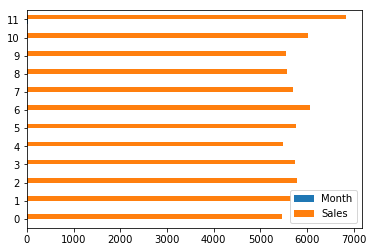

In [46]:
# 按月份sum销售额
new_train[['Month','Sales']].groupby('Month',as_index=False).mean().sort_values('Month')
month_sales=new_train[['Month','Sales']].groupby('Month',as_index=False).mean().sort_values('Month')
month_sales.plot(kind='barh',rot=0)
plt.show()

In [43]:
data_counts=new_train['Date'].value_counts()
print(len(data_counts))
# data_counts.plot(kind='barh',rot=0)
# plt.show()

942


### 单变量分析

TypeError: unhashable type: 'slice'

### 测试xgboost模型

In [15]:
model = XGBClassifier()